In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
import sklearn.svm,sklearn.model_selection,sklearn.linear_model,sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC#support vector classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
gen=pd.read_csv(r'C:\Users\Dell\Desktop\sahil\Demo Datasets\gender_voice_dataset.csv')

In [4]:
gen.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [5]:
gen.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

In [6]:
gen.shape

(3168, 21)

In [7]:
gen_data=pd.DataFrame(gen)

In [8]:
gen_data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [9]:
gen_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

<AxesSubplot:>

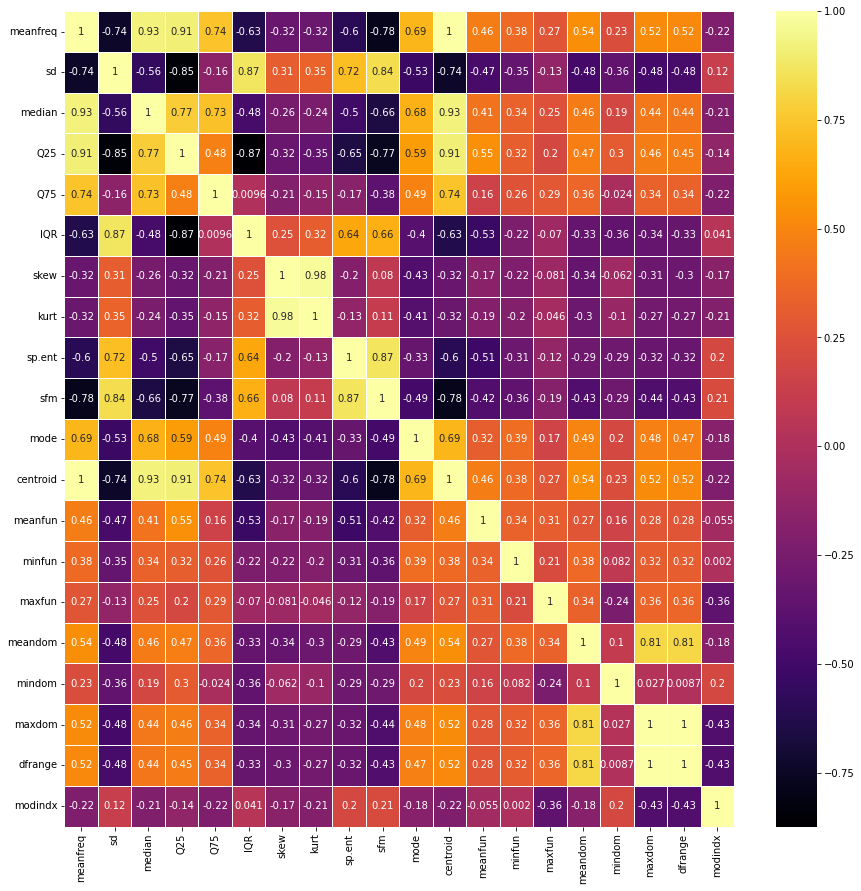

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='inferno',linewidth=0.5)

In [11]:
gen_data

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    male  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[3168 rows x 21 columns]

In [12]:
gen_data.replace(to_replace="male",value=1,inplace=True)
gen_data.replace(to_replace="female",value=0,inplace=True)

In [13]:
gen_data

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000      1  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632      1  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512      1  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119      1  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274      1  
...        ...       ...       ...       ...       ...       ...    ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929      0  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897      0  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759      0  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002      0  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000      0  

[3168 rows x 21 columns]

In [14]:
xData=gen_data.iloc[:,:-1]
yData=gen_data.iloc[:,1]
xData.shape,yData.shape

((3168, 20), (3168,))

In [15]:
xData.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [16]:
TRAINSPLIT=0.8
xTrain,xTest,yTrain,yTest=train_test_split(xData,yData,train_size=TRAINSPLIT)
xTrain.shape,yTrain.shape

((2534, 20), (2534,))

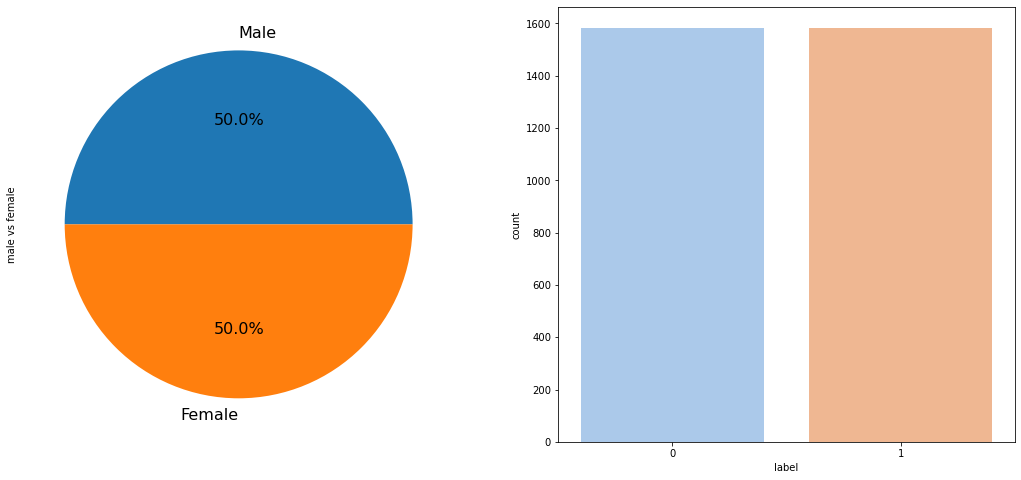

In [17]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
gen_data.label.value_counts().plot(kind="pie",
                             fontsize=16,
                             labels=["Male","Female"],
                             ylabel="male vs female",
                            autopct='%1.1f%%');
plt.subplot(1,2,2)
sns.countplot(x='label',data=gen_data,palette='pastel')
plt.show()

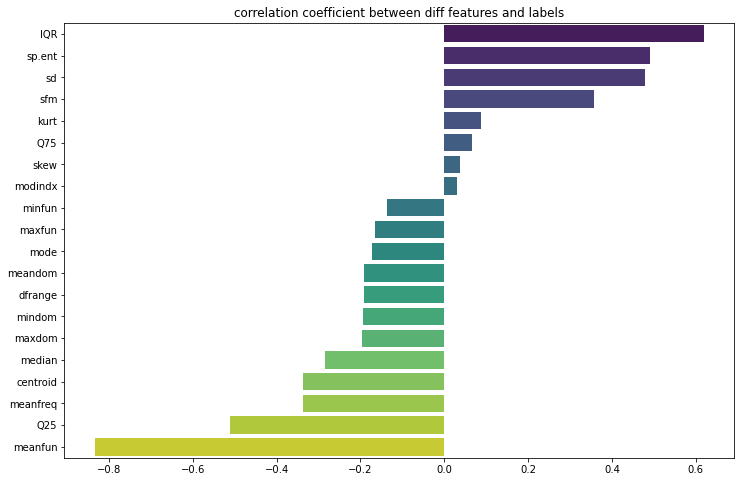

In [18]:
#correlation coefficient 
plt.figure(figsize=(12,8))
#establish the correlation in bw label and ROW under descend
data=gen_data.corr()["label"].sort_values(ascending=False)
#stored the index number of sorted data in a variable "indices"
indices=data.index
labels=[]
corr=[]
for i in range(1,len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr,y=labels,palette='viridis')
plt.title("correlation coefficient between diff features and labels")
plt.show()

In [19]:
corr_dt=gen_data.corr()["label"].sort_values(ascending=False)

In [20]:
corr_dt

label       1.000000
IQR         0.618916
sp.ent      0.490552
sd          0.479539
sfm         0.357499
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
minfun     -0.136692
maxfun     -0.166461
mode       -0.171775
meandom    -0.191067
dfrange    -0.192213
mindom     -0.194974
maxdom     -0.195657
median     -0.283919
centroid   -0.337415
meanfreq   -0.337415
Q25        -0.511455
meanfun    -0.833921
Name: label, dtype: float64

In [22]:
#logistic regression
regressionmodel=LogisticRegression(solver='liblinear')

In [23]:
regressionmodel.fit(xTrain,yTrain)
regressionmodel.score(xTrain,yTrain)

ValueError: Unknown label type: 'continuous'

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sd', ylabel='count'>

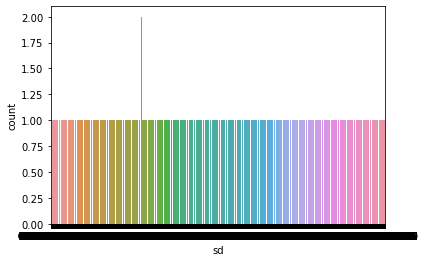

In [27]:
sns.countplot(yTrain)